In [1]:
import math
import matplotlib.pyplot as plt
import time
from IPython.display import display, clear_output

In [2]:
def find_distance(p1, p2, p3):

    # using the formula ax + by + c = 0
    a = p1[1] - p2[1]
    b = p2[0] - p1[0]
    c = p1[0] * p2[1] - p2[0] * p1[1]

    # use dot product to find the distance between a line and a point
    return abs( a * p3[0] + b * p3[1] + c) / math.sqrt(a * a + b * b)

In [3]:
def create_segment(p1, p2, v):

    above = []
    below = []

    if p2[0] - p1[0] == 0:
        return above, below
    
    #calculate m and o from y = mx + o
    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    c = -m * p1[0] + p1[1]

    #loop through each coordinate and place it into the correct list
    for coordinate in v:

        #y > mx + o means it is above the line
        if coordinate[1] > m * (coordinate[0]) + c:
            above.append(coordinate)
        #y < mx + o means it is below the line
        elif coordinate[1] < m * (coordinate[0]) + c:
            below.append(coordinate)


    return above, below


In [4]:
def quickhull2(p1, p2, segment, flag):

    if segment == [] or p1 is None or p2 is None:
        return []
    
    convex_hull = []

    # calculate the distance of every point from the line to find the farthest point
    farthest_distance = -1
    farthest_point = None

    for point in segment:

        distance = find_distance(p1, p2, point)

        if distance > farthest_distance:
            
            farthest_distance = distance
            farthest_point = point

    convex_hull = convex_hull +  [farthest_point]

    print("Convex Hull in Quickhull2", convex_hull)

    # point is now in the convex hull so remove it from the segment
    segment.remove(farthest_point)

    # determine the segments formed from two lines p1-farthest_point and p2-farthest_point
    point1above, point1below = create_segment(p1, farthest_point, segment)
    point2above, point2below = create_segment(p2, farthest_point, segment)


    # only use the segmetns in the same direction, the opposite direction is contained in the convex hull
    if flag == "above":
        convex_hull = convex_hull + quickhull2(p1, farthest_point, point1above, "above")
        convex_hull = convex_hull + quickhull2(farthest_point, p2, point2above, "above")

    else:
        convex_hull = convex_hull + quickhull2(p1, farthest_point, point1below, "below")
        convex_hull = convex_hull + quickhull2(farthest_point, p2, point2below, "below")

    return convex_hull


In [5]:
def quickhull(v):

    if len(v) <= 2:

        return v
    
    convex_hull = []

    sort = sorted(v, key = lambda x : x[0])

    p1 = sort[0]
    p2 = sort[-1]

    convex_hull = convex_hull + [p1, p2]

    # remove from the list as they are now in the convex hull
    sort.pop(0)
    sort.pop(-1)

    # initial_plot

    fig, ax = plt.subplots()
    # Clear the plot and update it
    ax.clear()
    ax.scatter([x[0] for x in v], [y[1] for y in v], c='b', marker='o', label='Points')

    # draw Convex Hull points
    ax.scatter([x[0] for x in convex_hull], [y[1] for y in convex_hull], c = 'r', marker='s', s=100, label='Highlighted Points')

    # Draw a line between the highlighted points
    ax.plot([x[0] for x in convex_hull], [y[1] for y in convex_hull], 'g-', linewidth=2, label='Line between Highlighted Points')

    # Add labels and title
    ax.set_title('Scatter Plot of Points')

    # Display the plot in the notebook
    display(fig)
    clear_output(wait=True)
    
    # Add a small delay for visualization
    time.sleep(0.5)
    
    

    #determine points above and below the line
    above, below = create_segment(p1, p2, sort)
    
    convex_hull = convex_hull + quickhull2(p1, p2, above, "above")
    
    convex_hull = convex_hull + quickhull2(p1, p2, below, "below")

    return convex_hull

Convex Hull in Quickhull2 [[-1, 1]]
Convex Hull in Quickhull2 [[0, 0]]
Convex Hull in Quickhull2 [[-1, -5]]


[[-5, -3], [1, -4], [-1, 1], [0, 0], [-1, -5]]

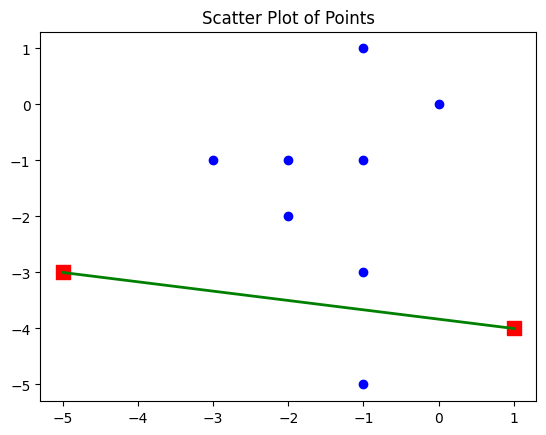

In [6]:
v = []

v.append([0, 0])
v.append([1, -4])
v.append([-1, -5])
v.append([-5, -3])
v.append([-3, -1])
v.append([-1, -3])
v.append([-2, -2])
v.append([-1, -1])
v.append([-2, -1])
v.append([-1, 1])


convex_hull = quickhull(v)
convex_hull